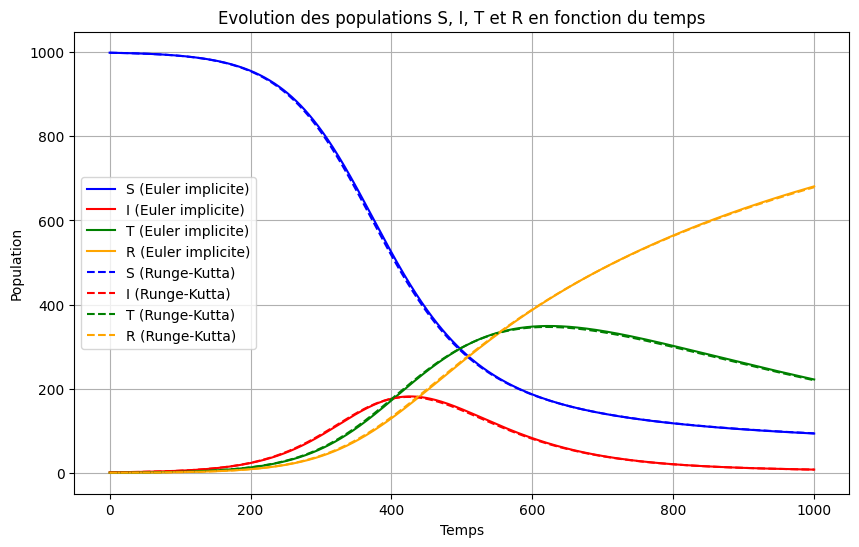

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Définition des paramètres
N = 1000  # Population totale
beta = 0.3  # Taux de transmission
alpha = 0.1  # Taux de guérison
gamma = 0.05  # Taux de mortalité
eta = 0.02  # Taux de transition de T vers R
delta = 0.1  # Paramètre supplémentaire

# Conditions initiales
S0 = N - 1
I0 = 1
T0 = 0
R0 = 0

# Pas de temps et nombre d'itérations
dt = 0.1
iterations = 1000

# Fonction décrivant les équations différentielles du système SIR
def equations_SIR(S, I, T, R):
    dS = -beta / N * (I + delta * T) * S
    dI = beta / N * (S * (I + delta * T)) - (alpha + gamma) * I
    dT = alpha * I - eta * T
    dR = gamma * I + eta * T
    return dS, dI, dT, dR

# Méthode d'Euler implicite
def euler_implicite_step(S, I, T, R, dt):
    dS, dI, dT, dR = equations_SIR(S, I, T, R)
    S_new = S / (1 + beta * dt * (I + delta * T) / N)
    I_new = I + dt * (beta * S * (I + delta * T) / N - (alpha + gamma) * I)
    T_new = T + dt * (alpha * I - eta * T)
    R_new = R + dt * (gamma * I + eta * T)
    return S_new, I_new, T_new, R_new

# Méthode de Runge-Kutta d'ordre 4
def runge_kutta_step(S, I, T, R, dt):
    k1 = np.array(equations_SIR(S, I, T, R))
    k2 = np.array(equations_SIR(S + 0.5 * dt * k1[0], I + 0.5 * dt * k1[1], T + 0.5 * dt * k1[2], R + 0.5 * dt * k1[3]))
    k3 = np.array(equations_SIR(S + 0.5 * dt * k2[0], I + 0.5 * dt * k2[1], T + 0.5 * dt * k2[2], R + 0.5 * dt * k2[3]))
    k4 = np.array(equations_SIR(S + dt * k3[0], I + dt * k3[1], T + dt * k3[2], R + dt * k3[3]))
    S_new = S + (dt / 6) * (k1[0] + 2 * k2[0] + 2 * k3[0] + k4[0])
    I_new = I + (dt / 6) * (k1[1] + 2 * k2[1] + 2 * k3[1] + k4[1])
    T_new = T + (dt / 6) * (k1[2] + 2 * k2[2] + 2 * k3[2] + k4[2])
    R_new = R + (dt / 6) * (k1[3] + 2 * k2[3] + 2 * k3[3] + k4[3])
    return S_new, I_new, T_new, R_new

# Fonction pour résoudre le système pour une méthode donnée
def solve_system(method):
    S_values = [S0]
    I_values = [I0]
    T_values = [T0]
    R_values = [R0]
    S, I, T, R = S0, I0, T0, R0
    for _ in range(iterations):
        S, I, T, R = method(S, I, T, R, dt)
        S_values.append(S)
        I_values.append(I)
        T_values.append(T)
        R_values.append(R)
    return S_values, I_values, T_values, R_values

# Résolution du système avec les deux méthodes
S_euler, I_euler, T_euler, R_euler = solve_system(euler_implicite_step)
S_rk4, I_rk4, T_rk4, R_rk4 = solve_system(runge_kutta_step)

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.plot(range(iterations + 1), S_euler, label='S (Euler implicite)', color='blue')
plt.plot(range(iterations + 1), I_euler, label='I (Euler implicite)', color='red')
plt.plot(range(iterations + 1), T_euler, label='T (Euler implicite)', color='green')
plt.plot(range(iterations + 1), R_euler, label='R (Euler implicite)', color='orange')
plt.plot(range(iterations + 1), S_rk4, label='S (Runge-Kutta)', linestyle='--', color='blue')
plt.plot(range(iterations + 1), I_rk4, label='I (Runge-Kutta)', linestyle='--', color='red')
plt.plot(range(iterations + 1), T_rk4, label='T (Runge-Kutta)', linestyle='--', color='green')
plt.plot(range(iterations + 1), R_rk4, label='R (Runge-Kutta)', linestyle='--', color='orange')
plt.xlabel('Temps')
plt.ylabel('Population')
plt.title('Evolution des populations S, I, T et R en fonction du temps')
plt.legend()
plt.grid(True)
plt.show()


In [1]:
from first_attempt import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import ipywidgets as widgets
from ipywidgets import interact, Layout

# Fonction décrivant les équations différentielles du système SIR
def equations_SIR(t, y, beta, alpha, gamma, eta, delta):
    S, I, T, R = y
    dS = -beta / N * (I + delta * T) * S
    dI = beta / N * (S * (I + delta * T)) - (alpha + gamma) * I
    dT = alpha * I - eta * T
    dR = gamma * I + eta * T
    return [dS, dI, dT, dR]

# Fonction pour résoudre le système pour les paramètres donnés
def solve_system(beta, alpha, gamma, eta, delta, max_time):
    sol = solve_ivp(equations_SIR, [0, max_time], [S0, I0, T0, R0], args=(beta, alpha, gamma, eta, delta), t_eval=t_values)
    return sol.y

# Fonction de mise à jour du graphique en fonction des paramètres
def update_plot(beta, alpha, gamma, eta, delta, max_time):
    t_values = np.linspace(0, max_time, 1000)
    S, I, T, R = solve_system(beta, alpha, gamma, eta, delta, max_time)
    plt.figure(figsize=(10, 6))
    plt.plot(t_values, S, label='S', color='blue')
    plt.plot(t_values, I, label='I', color='red')
    plt.plot(t_values, T, label='T', color='green')
    plt.plot(t_values, R, label='R', color='orange')
    plt.xlabel('Temps')
    plt.ylabel('Population')
    plt.title('Evolution des populations S, I, T et R en fonction du temps')
    plt.legend()
    plt.grid(True)
    plt.show()

# Paramètres du modèle
N = 1000  # Population totale
S0 = N - 1
I0 = 1
T0 = 0
R0 = 0
max_time_default = 100
t_values = np.linspace(0, max_time_default, 1000)

# Création des sliders pour chaque paramètre
beta_slider = widgets.FloatSlider(value=0.3, min=0, max=1, step=0.01, description='Beta:', layout=Layout(width='50%'))
alpha_slider = widgets.FloatSlider(value=0.1, min=0, max=1, step=0.01, description='Alpha:', layout=Layout(width='50%'))
gamma_slider = widgets.FloatSlider(value=0.05, min=0, max=1, step=0.01, description='Gamma:', layout=Layout(width='50%'))
eta_slider = widgets.FloatSlider(value=0.02, min=0, max=1, step=0.01, description='Eta:', layout=Layout(width='50%'))
delta_slider = widgets.FloatSlider(value=0.1, min=0, max=1, step=0.01, description='Delta:', layout=Layout(width='50%'))
max_time_slider = widgets.FloatSlider(value=max_time_default, min=100, max=1000, step=1, description='Max Time:', layout=Layout(width='50%'))

# Création de l'interface interactive
interact(update_plot, beta=beta_slider, alpha=alpha_slider, gamma=gamma_slider, eta=eta_slider, delta=delta_slider, max_time=max_time_slider)


interactive(children=(FloatSlider(value=0.3, description='Beta:', layout=Layout(width='50%'), max=1.0, step=0.…

<function __main__.update_plot(beta, alpha, gamma, eta, delta, max_time)>

In [1]:
from first_attempt import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import ipywidgets as widgets
from ipywidgets import interact, Layout

In [8]:
# Fonction décrivant les équations différentielles du système SIR
def equations_SIR(t, y, beta, alpha, gamma, eta, delta):
    S, I, T, R = y
    dS = -beta / N * (I + delta * T) * S
    dI = beta / N * (S * (I + delta * T)) - (alpha + gamma) * I
    dT = alpha * I - eta * T
    dR = gamma * I + eta * T
    return [dS, dI, dT, dR]

# Fonction pour résoudre le système pour les paramètres donnés
def solve_system(beta, alpha, gamma, eta, delta):
    sol = solve_ivp(equations_SIR, [0, max_time], [S0, I0, T0, R0], args=(beta, alpha, gamma, eta, delta), t_eval=t_values)
    return sol.y

# Fonction de mise à jour du graphique en fonction des paramètres
def update_plot(beta, alpha, gamma, eta, delta):
    S, I, T, R = solve_system(beta, alpha, gamma, eta, delta)
    plt.figure(figsize=(6, 6))
    plt.plot(t_values, S, label='S', color='blue')
    plt.plot(t_values, I, label='I', color='red')
    plt.plot(t_values, T, label='T', color='green')
    plt.plot(t_values, R, label='R', color='orange')
    plt.xlabel('Temps')
    plt.ylabel('Population')
    plt.title('Evolution des populations S, I, T et R en fonction du temps')
    plt.legend()
    plt.grid(True)
    plt.show()

In [9]:
# Paramètres du modèle
N = 1000  # Population totale
S0 = N - 1
I0 = 1
T0 = 0
R0 = 0
max_time = 100
t_values = np.linspace(0, max_time, 1000)

In [10]:
# Création des sliders pour chaque paramètre
beta_slider = widgets.FloatSlider(value=0.3, min=0, max=1, step=0.01, description='Beta:', layout=Layout(width='50%'))
alpha_slider = widgets.FloatSlider(value=0.1, min=0, max=1, step=0.01, description='Alpha:', layout=Layout(width='50%'))
gamma_slider = widgets.FloatSlider(value=0.05, min=0, max=1, step=0.01, description='Gamma:', layout=Layout(width='50%'))
eta_slider = widgets.FloatSlider(value=0.02, min=0, max=1, step=0.01, description='Eta:', layout=Layout(width='50%'))
delta_slider = widgets.FloatSlider(value=0.1, min=0, max=1, step=0.01, description='Delta:', layout=Layout(width='50%'))

In [11]:

# Création de l'interface interactive
interact(update_plot, beta=beta_slider, alpha=alpha_slider, gamma=gamma_slider, eta=eta_slider, delta=delta_slider)

interactive(children=(FloatSlider(value=0.3, description='Beta:', layout=Layout(width='50%'), max=1.0, step=0.…

<function __main__.update_plot(beta, alpha, gamma, eta, delta)>